In [9]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
df= pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

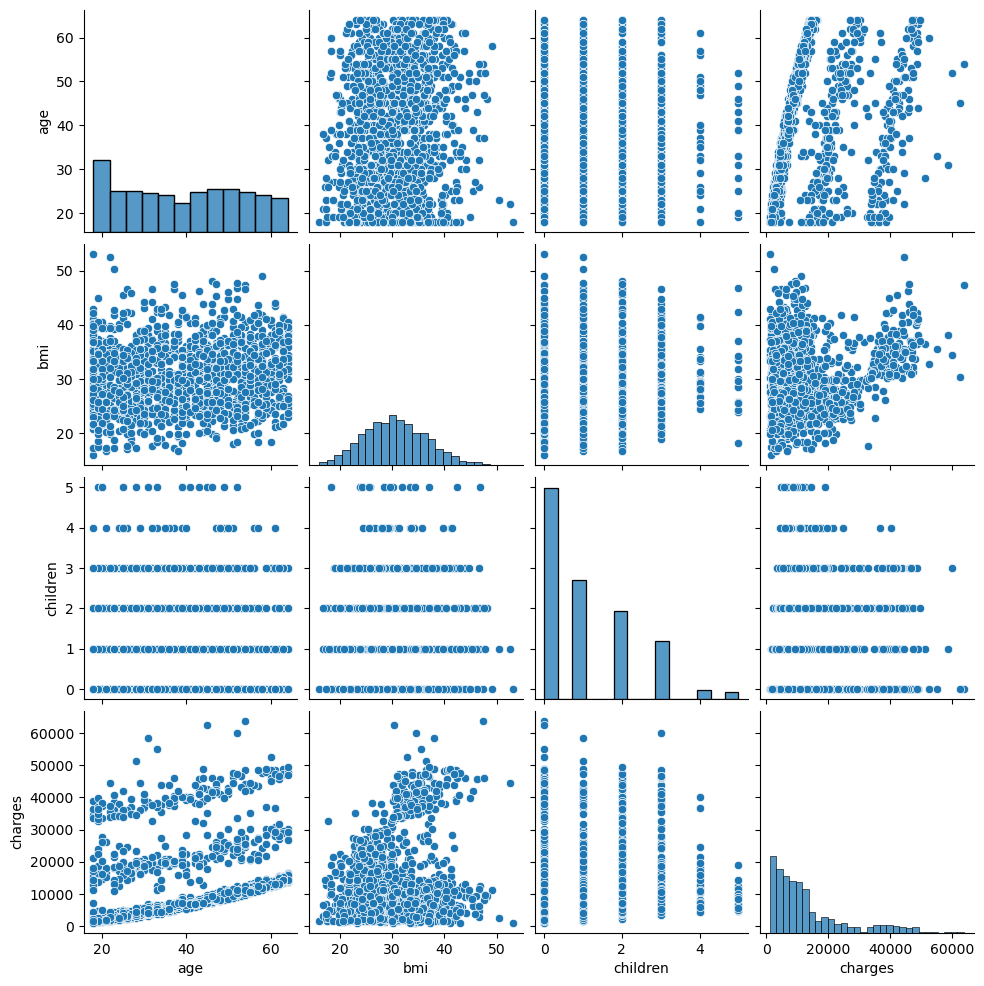

In [13]:
sns.pairplot(df)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

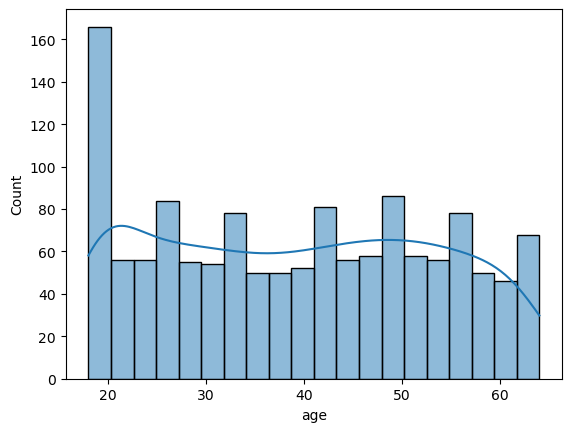

In [17]:
sns.histplot(df['age'], kde=True, bins=20)

<Axes: xlabel='sex', ylabel='count'>

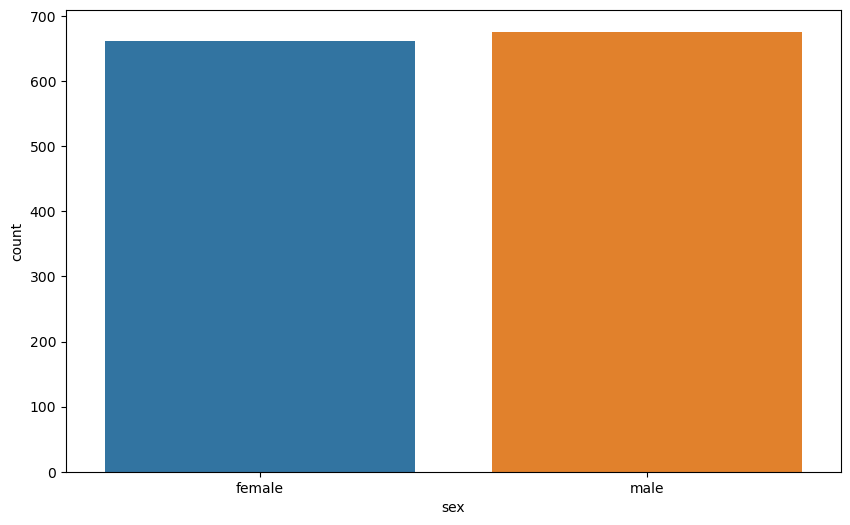

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x="sex", data=df)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

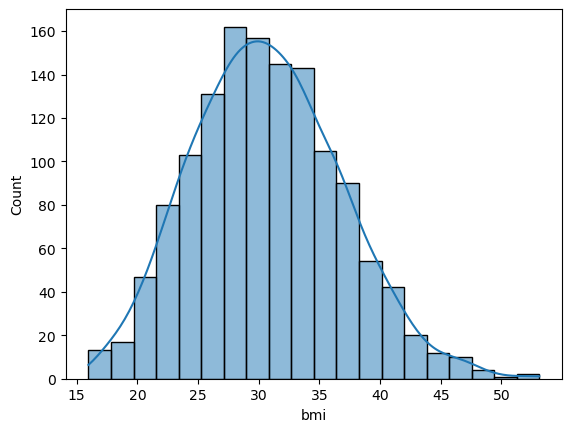

In [51]:
sns.histplot(df['bmi'], kde=True, bins=20)

In [76]:
df[df["age"]<21]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
15,19,male,24.600,1,no,southwest,1837.23700
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
...,...,...,...,...,...,...,...
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270
1334,18,female,31.920,0,no,northeast,2205.98080


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='children', ylabel='count'>

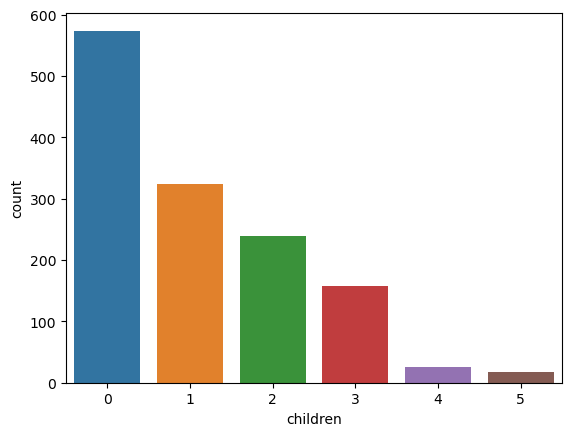

In [79]:
sns.countplot(x="children", data=df)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='children'>

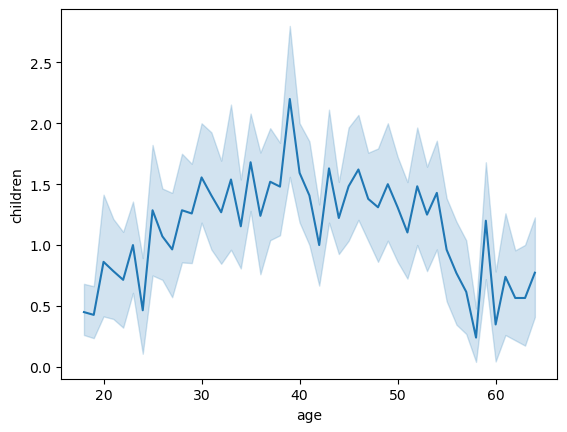

In [81]:
sns.lineplot(x="age", y="children", data=df)

<Axes: xlabel='age', ylabel='children'>

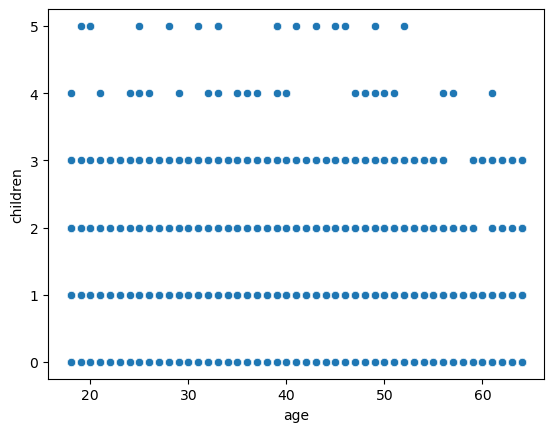

In [83]:
sns.scatterplot(x="age", y="children", data=df)

In [116]:
#encoding catagorical data if any
df.replace({"region":{"northeast":0, "northwest":1, "southwest":2, "southeast":3}}, inplace=True)
df.replace({"smoker":{"yes":0,"no":1}}, inplace=True)
df.replace({"sex":{"male":0, "female":1}}, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,3,1725.55230
2,28,0,33.000,3,1,3,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,0,2205.98080
1335,18,1,36.850,0,1,3,1629.83350
1336,21,1,25.800,0,1,2,2007.94500


In [123]:
X=df.drop(["charges"], axis=1)
Y=df["charges"]

In [127]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [133]:
lr=LinearRegression()

In [139]:
lr.fit(X_train, Y_train)

LinearRegression()

In [141]:
predictions=lr.predict(X_test)

In [147]:
Y_test


764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

In [153]:
predictions

array([ 8.91855831e+03,  7.08265308e+03,  3.69319321e+04,  9.56912125e+03,
        2.70515299e+04,  1.12645494e+04,  1.46381024e+01,  1.72568747e+04,
        8.68827941e+02,  1.13844067e+04,  2.82239841e+04,  9.53775751e+03,
        4.85669778e+03,  3.83556317e+04,  4.02361701e+04,  3.69972563e+04,
        1.50895394e+04,  3.56617654e+04,  8.75459365e+03,  3.14501418e+04,
        3.95309656e+03,  1.04281787e+04,  2.54368095e+03,  7.19372783e+03,
        1.13440599e+04,  1.30497404e+04,  1.47918851e+04,  6.13929570e+03,
        9.94007191e+03,  1.85539268e+03,  9.23539445e+03,  1.31970653e+04,
        4.19468127e+03,  3.25986081e+03,  4.65501708e+03,  1.32992025e+04,
        1.98648086e+03,  8.95599942e+03,  3.32581656e+04,  3.23907698e+04,
        3.93253196e+03,  4.42014369e+03,  1.44173386e+04,  1.15899251e+04,
        8.58569887e+03,  1.23930513e+04,  5.28086421e+03,  3.14314884e+03,
        3.53364370e+04,  8.98889884e+03,  1.56594526e+04,  2.00978666e+03,
        1.25465762e+04,  

<Axes: xlabel='charges'>

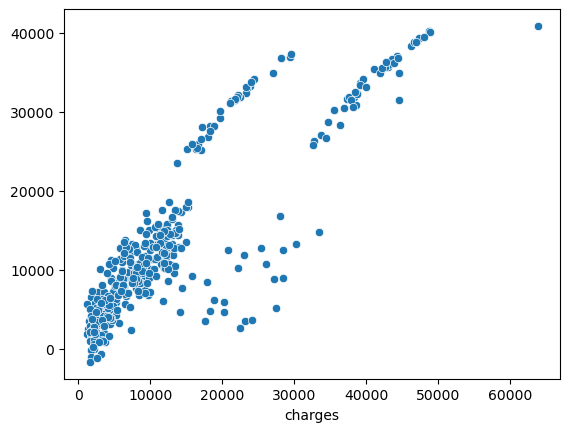

In [169]:
sns.scatterplot(x=Y_test, y=predictions)

In [173]:
lr.score(X_test,predictions)

1.0

In [178]:
import math 
scoreMAE=metrics.mean_absolute_error(Y_test,predictions)
scoreMSE=metrics.mean_squared_error(Y_test,predictions)
scoreRMSE=math.sqrt(scoreMSE)
print(scoreMAE, scoreMSE, scoreRMSE)

4140.928724833353 33772492.569441006 5811.410549035492
